In [1]:
import pandas as pd
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from wordcloud import WordCloud
from nltk.stem import PorterStemmer , WordNetLemmatizer
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('spam.csv' , usecols = ['v1','v2'] , encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [5]:
df['v1'] = df['v1'].replace('ham' , 0)
df['v1'] = df['v1'].replace('spam' , 1)

In [6]:
df_spam    = df[df.v1 == 1]
df_nonspam = df[df.v1 == 0]

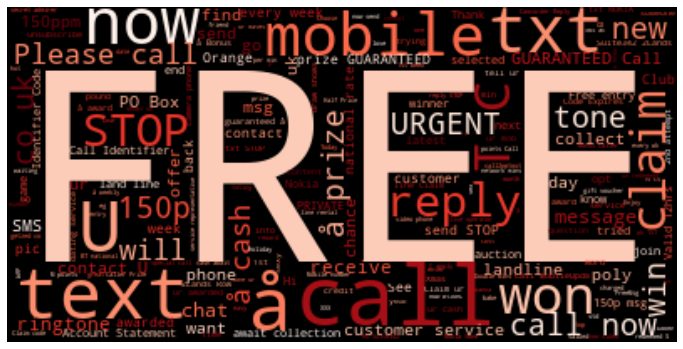

In [7]:
text_spam    = " ".join(review for review in df_spam['v2'])
text_nonspam = " ".join(review for review in df_nonspam['v2'])
wordcloud = WordCloud(max_font_size = 160 , margin = 0 , background_color = "black" , colormap="Reds").generate(text_spam)
plt.figure(figsize = (12 , 12), facecolor = None) 
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
stemmer    = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def pre_process(text):
    #text = word_tokenize(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')] #text without stopwords
    text = [stemmer.stem(word) for word in text]         #text after stemmed
    text = [lemmatizer.lemmatize(word) for word in text] #text after lemmatized
    return " ".join(text).lower()

In [9]:
df['pre_processed'] = df['v2'].map(pre_process)

In [10]:
df.head()

,v1,v2,pre_processed
0,0,"Go until jurong point, crazy.. Available only ...","go jurong point, crazy.. avail bugi n great wo..."
1,0,Ok lar... Joking wif u oni...,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...","nah think goe usf, live around though"


In [11]:
X_train , X_test , Y_train , Y_test = train_test_split(df['pre_processed'] , df['v1'] , test_size = 0.30 , random_state = 20)

In [12]:
vectorizer  = TfidfVectorizer("english")
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed  = vectorizer.transform(X_test)

In [13]:
model   = LogisticRegression(C = 10)
history = model.fit(X_train_transformed, Y_train)
pred    = model.predict(X_test_transformed)
accuracy_score(Y_test , pred)

0.9766746411483254

In [14]:
print("Accuracy   :",metrics.accuracy_score(Y_test , pred))
print("Precision  :",metrics.precision_score(Y_test , pred))
print("Recall     :",metrics.recall_score(Y_test , pred))

Accuracy   : 0.9766746411483254
Precision  : 0.9948979591836735
Recall     : 0.8369098712446352


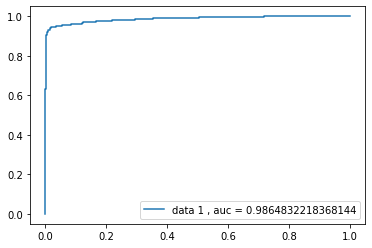

In [15]:
y_pred_proba  = model.predict_proba(X_test_transformed)[:,1]
fpr , tpr , _ = metrics.roc_curve(Y_test ,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test , y_pred_proba)
plt.plot(fpr , tpr , label = "data 1 , auc = " + str(auc))
plt.legend(loc = 4)
plt.show()

# Just To Test The Model

In [16]:
x = pre_process('Congratulations you win $1000 walmart gift card for free')
print(x)
x = [x]
x = vectorizer.transform(x)
print(x)
if model.predict(x) == 1:
    print('Spam')
else:
    print('Not Spam')

congratul win $1000 walmart gift card free
  (0, 6523)	0.31749803871387816
  (0, 6392)	0.4860407179099373
  (0, 2747)	0.3794522246529278
  (0, 2621)	0.2513710187871176
  (0, 1781)	0.420686282488302
  (0, 1493)	0.39440246027565307
  (0, 239)	0.351080884015334
Spam


# References

In [17]:
#https://towardsdatascience.com/how-to-build-your-first-spam-classifier-in-10-steps-fdbf5b1b3870
#https://www.datacamp.com/community/tutorials/wordcloud-python
#https://towardsdatascience.com/email-spam-detection-1-2-b0e06a5c0472
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python